# Gradient Boosting with XGBoost in Python
* ref http://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

In [6]:
# multiclass classification

import pandas
#import numpy

import xgboost

from sklearn import model_selection,cross_validation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import matplotlib.pyplot as plt


# load data
data = pandas.read_csv('iris.csv', header=1)
dataset = data.values
# split data into X and y
X = dataset[:,0:4]
Y = dataset[:,4]
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Accuracy: 92.00%


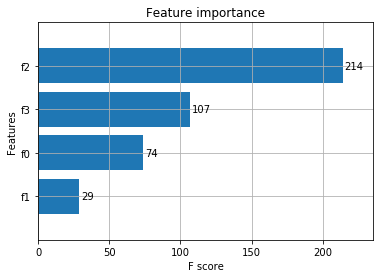

In [12]:
# plot the important features #
fig, ax = plt.subplots() #figsize=(12,18)
#xgboost.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
xgboost.plot_importance(model, height=0.8, ax=ax)
plt.show()